In [1]:
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd

iris = datasets.load_iris()
mpl.rcParams['figure.figsize'] = (12,8)

X = iris.data[:,[2,3]]
y = iris.target

In [8]:
def sigmoid(z):
    return 1.0 / (1.0 + np.exp(-z))

In [9]:
z = np.arange(-7,7,0.1)
phi = sigmoid(z)

([<matplotlib.axis.YTick at 0x7f8443215240>,
 <a list of 3 Text major ticklabel objects>)

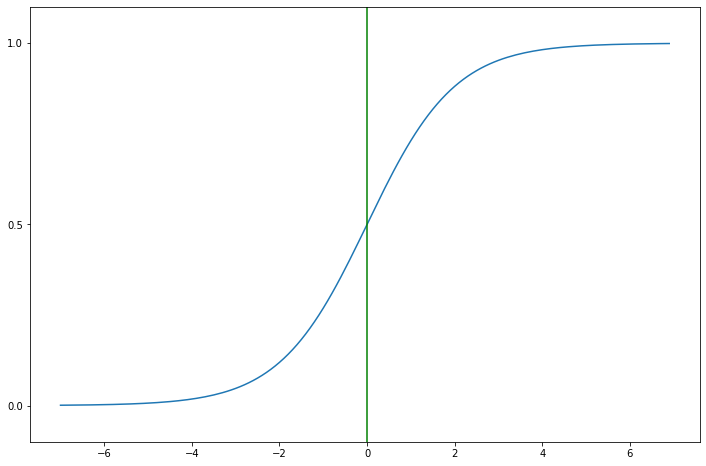

In [10]:
plt.plot(z, phi)
plt.axvline(0.0, color='green')
plt.ylim(-0.1,1.1)
plt.yticks([0.0,0.5,1])

### Разбиваем модель

In [11]:
from sklearn.model_selection import train_test_split

s = train_test_split(X, y, test_size=0.3, stratify=y, random_state = 1)
X_train, X_test, y_train, y_test = s

### Масштабируем признаки

In [12]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler().fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [13]:
from sklearn.linear_model import LogisticRegression

In [24]:
lr = LogisticRegression(random_state  = 1, C = 100.0).fit(X_train_std, y_train)

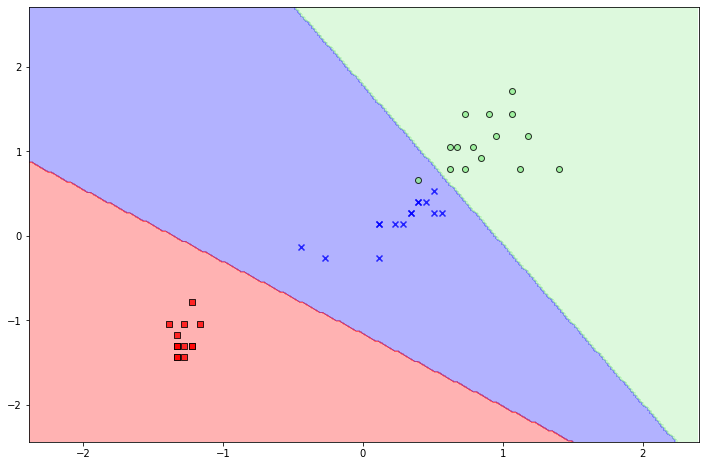

In [26]:
from Regions import plot_decision_regions

plot_decision_regions(X_test_std, y_test, classifier = lr)

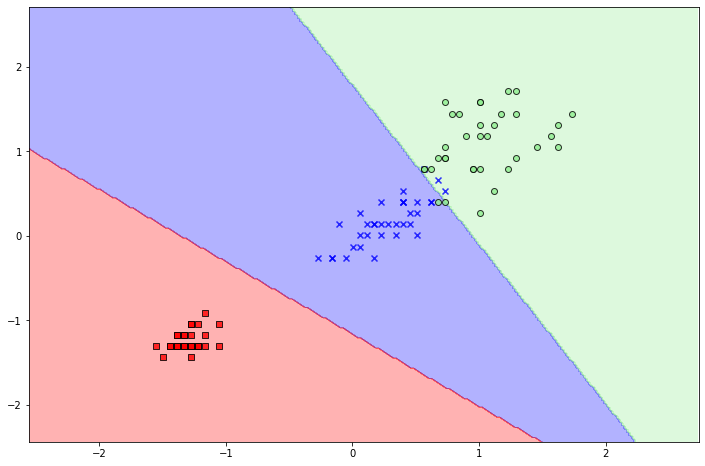

In [27]:
plot_decision_regions(X_train_std, y_train, classifier = lr)

### Оценим качество прогноза

In [30]:
from sklearn.metrics import accuracy_score

y_train_pred = lr.predict(X_train_std)
y_test_pred = lr.predict(X_test_std)

In [32]:
acc1 = round(accuracy_score(y_train, y_train_pred)*100,2)
print(f'{acc1}%')

95.24%


In [34]:
acc2 = round(accuracy_score(y_test, y_test_pred)*100,2)
print(f'{acc2}%')

97.78%


### Оценка вероятности принадлежности образцов к классам

In [74]:
prob = lr.predict_proba(X_test_std)

### Регуляризация

Функция штрафа (L2 - регуляризация)
$$ J\mathbf{(w)} = \sum\limits_i
\left[
    y^{(i)} \log \phi^{(i)}
    +
    \left( 1 - y^{(i)} \right)
    \log\left( 1 - \phi^{(i)} \right)
\right]
+
\frac{\lambda}{2} \| \mathbf{w} \|^2
$$

$$ C = \frac{1}{\lambda} $$

In [61]:
lr.coef_[1] # Весовые вектора

array([-2.03192177, -0.03413691])

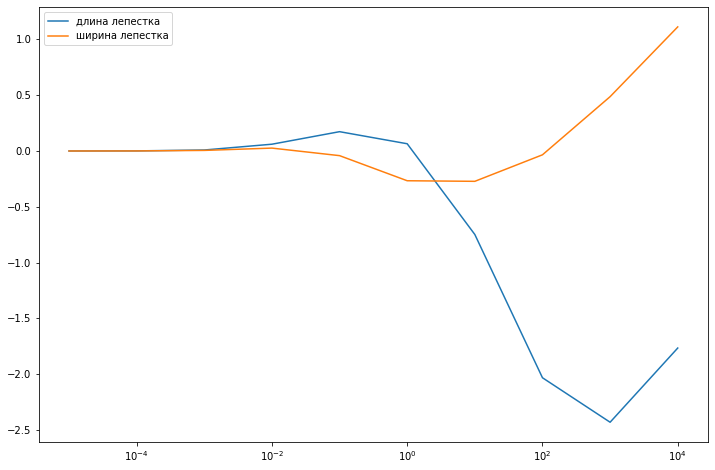

In [63]:
weights =[]
params = []

for c in np.arange(-5,5):
    lr1 = LogisticRegression(C=10.0**c, random_state=1)
    lr1.fit(X_train_std, y_train)
    weights.append(lr1.coef_[1])
    params.append(10.0**c)
weights = np.array(weights)

plt.plot(params, weights[:,0], label='длина лепестка')
plt.plot(params, weights[:,1], label='ширина лепестка')
plt.legend(loc = 'upper left')
plt.xscale('log')

### Метод опорных векторов и ближайших соседей

In [75]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [83]:
svm1 = SVC(kernel='linear', C=1.0, random_state=1).fit(X_train_std, y_train)

In [84]:
svm2 = SVC(kernel='rbf', C=1.0, random_state=1).fit(X_train_std, y_train)

In [85]:
nei1 = KNeighborsClassifier(n_neighbors=3).fit(X_train_std, y_train)

In [86]:
nei2 = KNeighborsClassifier(n_neighbors=7).fit(X_train_std, y_train)

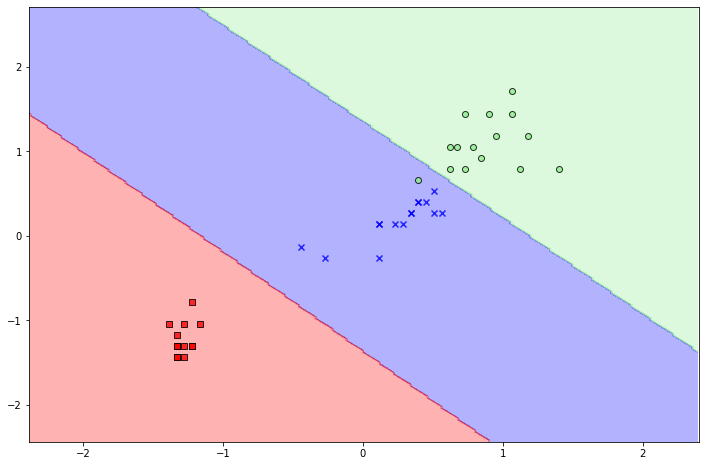

In [87]:
plot_decision_regions(X_test_std, y_test, classifier = svm1)

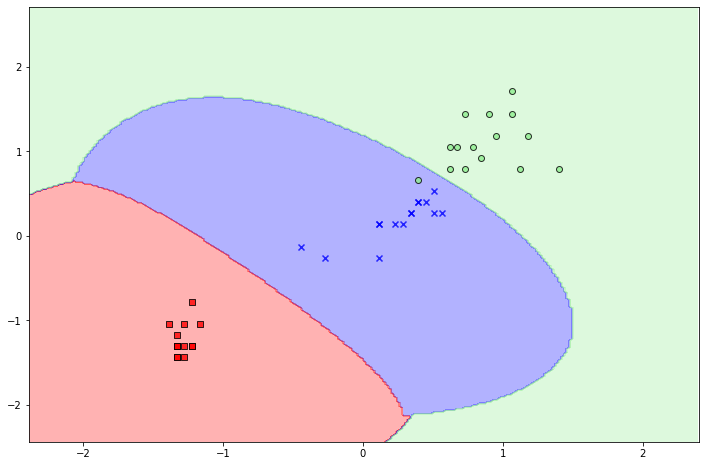

In [88]:
plot_decision_regions(X_test_std, y_test, classifier = svm2)

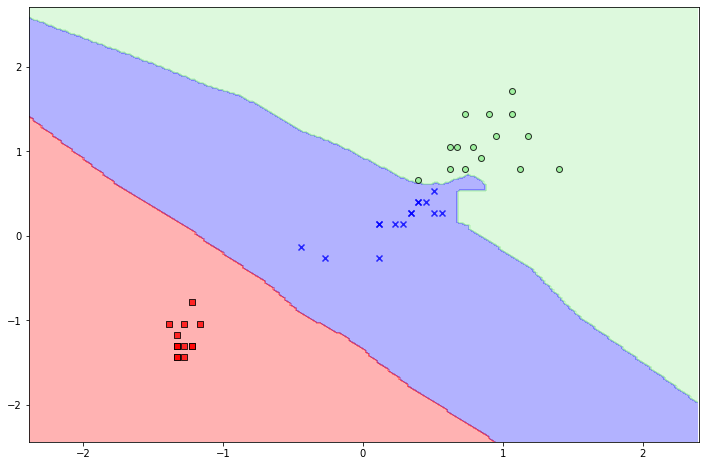

In [89]:
plot_decision_regions(X_test_std, y_test, classifier = nei1)

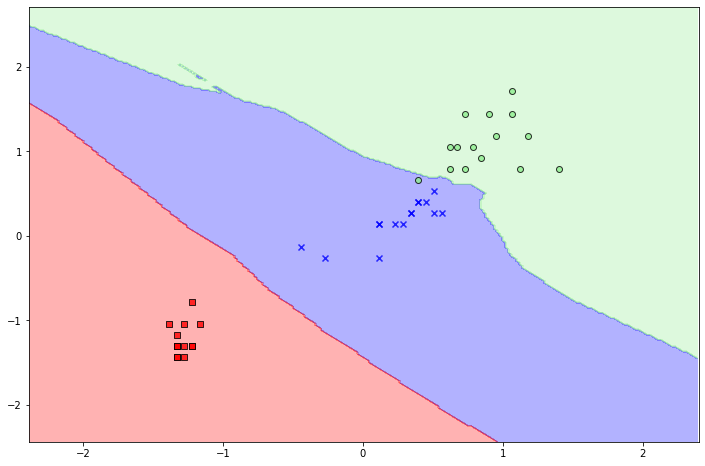

In [90]:
plot_decision_regions(X_test_std, y_test, classifier = nei2)

In [101]:
X_xor = np.random.randn(200,2)
y_xor = np.logical_xor( X_xor[:,0]>0, X_xor[:,1]>0)
y_xor = np.where( y_xor, 1, -1)

In [102]:
pos = y_xor > 0
neg = y_xor < 0

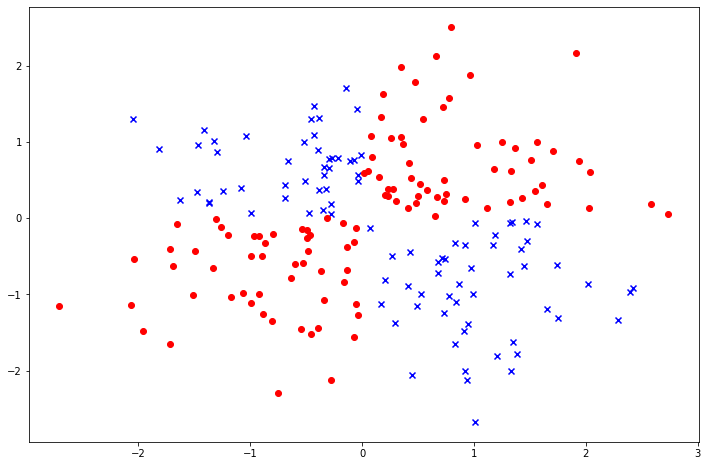

In [103]:
plt.scatter(X_xor[pos, 0], X_xor[pos, 1], color = 'blue', marker='x')
plt.scatter(X_xor[neg, 0], X_xor[neg, 1], color = 'red', marker='o')

In [112]:
svm1x = SVC(kernel='linear').fit(X_xor, y_xor)
svm2x = SVC(kernel='rbf',  C=1.0).fit(X_xor, y_xor)

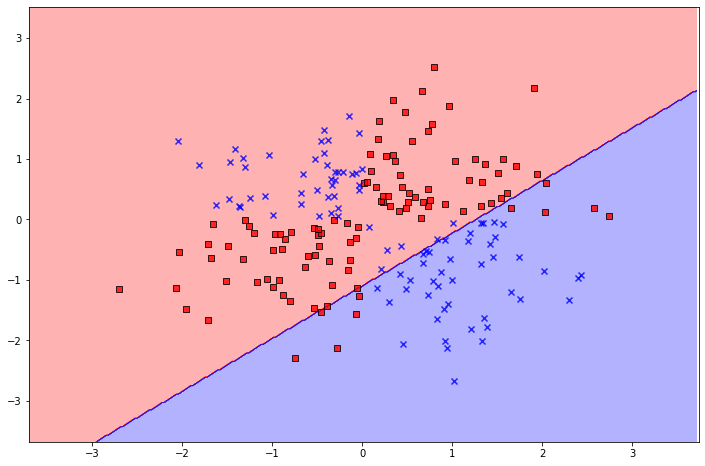

In [110]:
plot_decision_regions(X_xor, y_xor, classifier = svm1x)

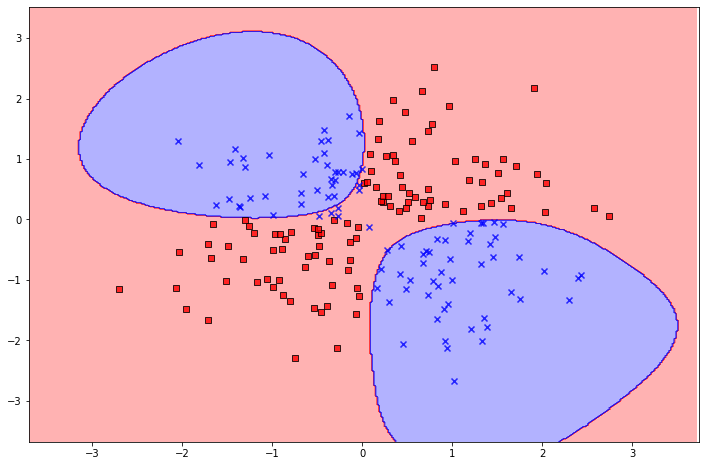

In [111]:
plot_decision_regions(X_xor, y_xor, classifier = svm2x)

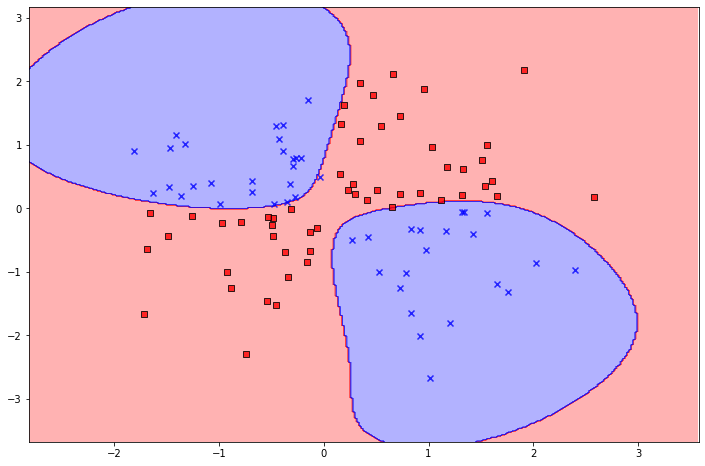

In [119]:
s = train_test_split(X_xor, y_xor, test_size=0.5, stratify=y_xor, random_state = 1)
X_train, X_test, y_train, y_test = s

sc = StandardScaler().fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

svm2x = SVC(kernel='rbf',  C=10.0).fit(X_train, y_train)
plot_decision_regions(X_test, y_test, classifier = svm2x)

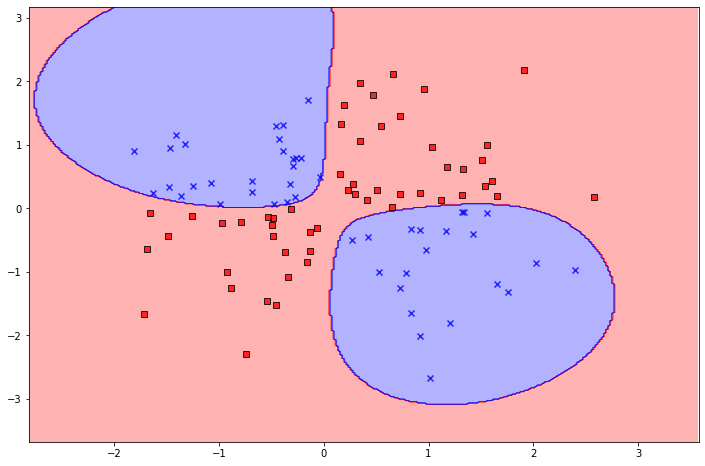

In [120]:
svm2x = SVC(kernel='rbf',  C=100.0).fit(X_train, y_train)
plot_decision_regions(X_test, y_test, classifier = svm2x)

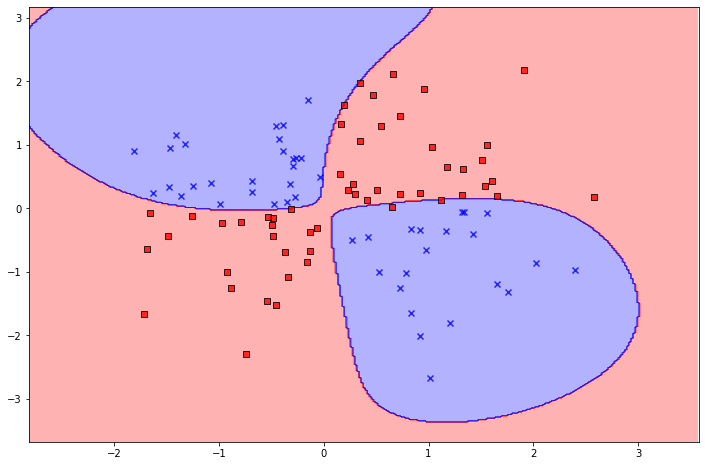

In [127]:
svm2x = SVC(kernel='rbf',  C=1000.0).fit(X_train, y_train)
plot_decision_regions(X_test, y_test, classifier = svm2x)

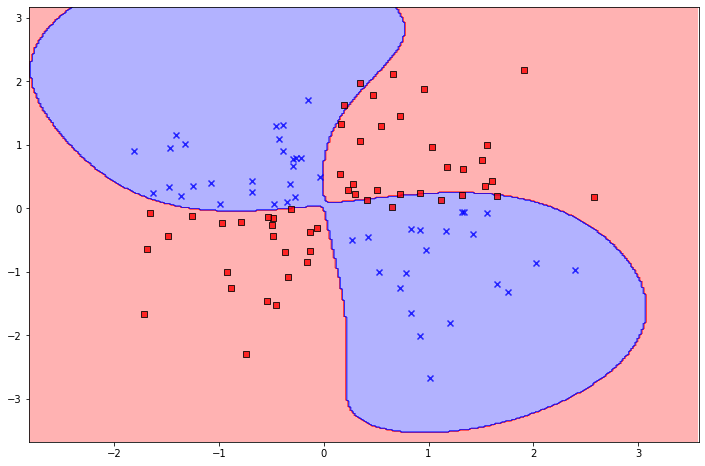

In [128]:
svm2x = SVC(kernel='rbf',  C=10000.0).fit(X_train, y_train)
plot_decision_regions(X_test, y_test, classifier = svm2x)

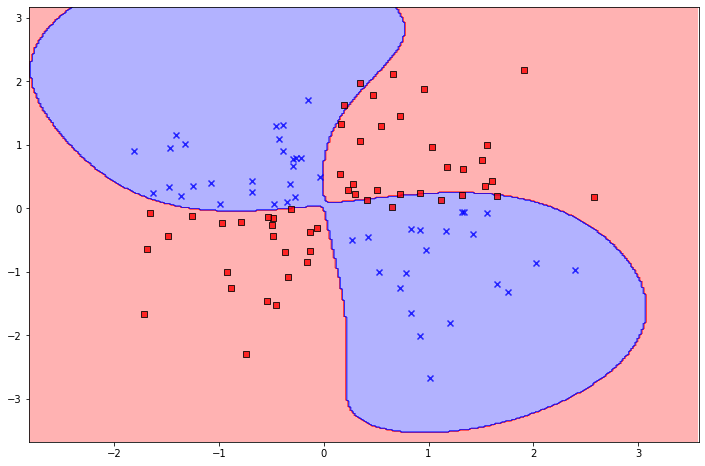

In [129]:
svm2x = SVC(kernel='rbf',  C=100000.0).fit(X_train, y_train)
plot_decision_regions(X_test, y_test, classifier = svm2x)